In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
import os
import requests
import copy
import functools
from pathlib import Path
from typing import Tuple, Callable, Union, Any
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import tensor
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
import torchvision.models as models  # Importing models directly from torchvision

import argparse
from collections import OrderedDict
import json
import PIL
import seaborn as sns
from PIL import Image
import time

In [4]:
data_dir = 'flowers'
data_train_dir = data_dir + '/train'
data_valid_dir = data_dir + '/valid'
data_test_dir = data_dir + '/test'
print(data_train_dir , data_valid_dir, data_test_dir )




flowers/train flowers/valid flowers/test


In [5]:
data_train_transforms = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

data_valid_transforms = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])


data_test_transforms = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])


# TODO: Load the datasets with ImageFolder
image_train_data = datasets.ImageFolder(data_train_dir, transform=data_train_transforms)
image_valid_data = datasets.ImageFolder(data_valid_dir, transform=data_train_transforms)
image_test_data = datasets.ImageFolder(data_test_dir, transform=data_train_transforms)


# TODO: Using the image datasets and the trainforms, define the dataloaders
data_train_loader = torch.utils.data.DataLoader(image_train_data, batch_size=64, shuffle=True)
data_valid_loader = torch.utils.data.DataLoader(image_valid_data, batch_size=64)
data_test_loader = torch.utils.data.DataLoader(image_test_data, batch_size=64)



In [6]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

out_put_categ = len(cat_to_name)
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

224


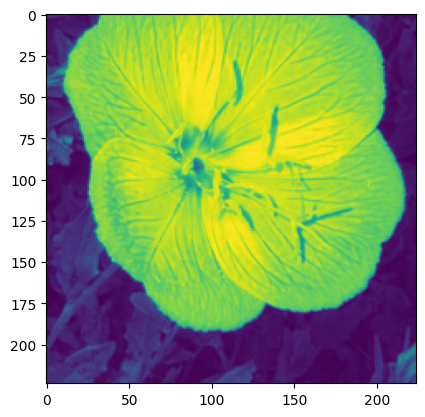

In [7]:
images, labels = next(iter(data_test_loader))
print(len(images[0,2]))
plt.imshow(images[0,0])


In [8]:
hidden_units = 4096

In [9]:

model_build = models.vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 56.0MB/s]


In [10]:
model_build

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
for param in model_build.parameters():
    param.requires_grad = False


In [12]:
model_build.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [13]:
model_build


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
classifier = nn.Sequential(OrderedDict([
                            ('fc1', nn.Linear(25088,hidden_units)),
                            ('relu', nn.ReLU()),
                            ('dropout', nn.Dropout(0.5)),
                            ('fc2', nn.Linear(hidden_units,out_put_categ)),
                            ('output', nn.LogSoftmax(dim=1))
                            ]))
model_build.classifier = classifier
model_build

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_build.to(device)
print(f'The device in use is {device}.\n')

The device in use is cpu.



In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizer = optim.Adam(model_build.classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss()
print_every = 5

epochs = 3  # assuming you have the epochs variable defined
batch_idx = 0
start_time = time.time()
print('Training started...')

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training
    model_build.train()
    running_loss = running_accuracy = 0
    for batch_idx, (images, labels) in enumerate(data_train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        train_output = model_build.forward(images)
        loss = criterion(train_output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        output = torch.exp(train_output).data
        top_output, top_class = output.topk(1, dim=1)
        matches = (top_class.squeeze() == labels).type(torch.FloatTensor)
        accuracy = matches.mean()
        running_accuracy += accuracy.item()

        if batch_idx % print_every == 0:
            print(f'Training Batch {batch_idx}/{len(data_train_loader)}')
            print(f'Training Loss: {running_loss / (batch_idx+1):.3f}')
            print(f'Training Accuracy: {running_accuracy / (batch_idx+1) * 100:.2f}')

    print(f'Training Loss: {running_loss / len(data_train_loader):.3f}')
    print(f'Training Accuracy: {running_accuracy / len(data_train_loader) * 100:.2f}')

end_time = time.time()
total_train_time = end_time - start_time
print("\nTraining completed in {:.0f}m {:.0f}s".format(total_train_time // 60, total_train_time % 60))



Training started...
Epoch 1/3
Training Batch 0/103
Training Loss: 4.698
Training Accuracy: 0.00
Training Batch 5/103
Training Loss: 10.886
Training Accuracy: 4.69
Training Batch 10/103
Training Loss: 9.502
Training Accuracy: 10.37
Training Batch 15/103
Training Loss: 7.986
Training Accuracy: 15.23
Training Batch 20/103
Training Loss: 6.751
Training Accuracy: 21.06
Training Batch 25/103
Training Loss: 5.902
Training Accuracy: 26.38
Training Batch 30/103
Training Loss: 5.274
Training Accuracy: 31.05
Training Batch 35/103
Training Loss: 4.794
Training Accuracy: 34.51
Training Batch 40/103
Training Loss: 4.408
Training Accuracy: 37.61
Training Batch 45/103
Training Loss: 4.094
Training Accuracy: 40.46
Training Batch 50/103
Training Loss: 3.823
Training Accuracy: 42.95
Training Batch 55/103
Training Loss: 3.587
Training Accuracy: 45.06
Training Batch 60/103
Training Loss: 3.387
Training Accuracy: 47.00
Training Batch 65/103
Training Loss: 3.215
Training Accuracy: 48.63
Training Batch 70/103

In [25]:
correct = total = 0
with torch.no_grad():
  for images, labels in data_test_loader:
    model_build.eval()
    images, labels = images.to(device), labels.to(device)
    test_output = model_build.forward(images)
    '''output = torch.exp(test_output)
    top_output, top_class = topk(1, dim = 1)'''
    _, predicted = torch.max(test_output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print(f'Test accuracy: {100 * correct / total}')


Test accuracy: 84.24908424908425


In [26]:
model_build.class_to_idx = image_train_data.class_to_idx

In [141]:
checkpoint = {'input_size': 25088,
              'output_size': 102,
              'epochs': epochs,
              'arch': 'vgg16',
              'batch_size': 64,
              'learning_rate': 0.001,
              'state_dict': model_build.state_dict(),
              'classifier' : model_build.classifier,
              'optimizer': optimizer.state_dict(),
              'mapping': model_build.class_to_idx}

torch.save(checkpoint, 'my_first_checkpoint.pth')

ckp =  'my_first_checkpoint.pth'

In [142]:

def load_model(file_name):
    checkpoint = torch.load(file_name)
    model_build = models.vgg16(pretrained = True)
    for param in model_build.parameters():
        param.requires_grad = False
    learning_rate = checkpoint['learning_rate']
    model_build = getattr(torchvision.models, checkpoint['arch'])(pretrained = True)
    model_build.classifier = checkpoint['classifier']
    model_build.epochs = checkpoint['epochs']
    model_build.load_state_dict(checkpoint['state_dict'])
    model_build.class_to_idx = checkpoint['class_to_idx']
    optimizer.load_state_dict(checkpoint['optimizer'])

    return model_build

In [143]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    Image_process = Image.open(image)

    size = [256,256]
    Image_process.thumbnail(size)

    width, height = Image_process.size

    width_new, height_new = 224, 224
   # center = width/4, height/4
    left = (width - width_new)/2
    top = (height - height_new)/2
    right = (width + width_new)/2
    bottom = (height + height_new)/2

    Image_process = Image_process.crop((left, top, right, bottom))


    numpy_image = np.array(Image_process)/255
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    numpy_image = (numpy_image - mean) / std
    numpy_image = numpy_image.transpose(2,0,1)


    return numpy_image

In [66]:
pract_image = "./flowers/test/19/image_06186.jpg"

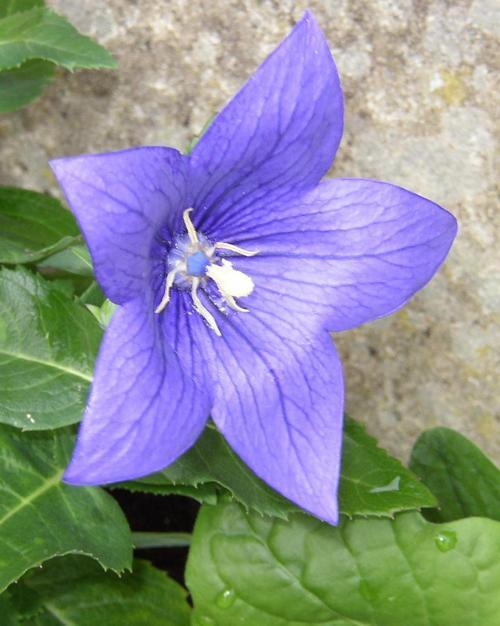

In [67]:
pic = Image.open(pract_image)
pic

<Axes: >

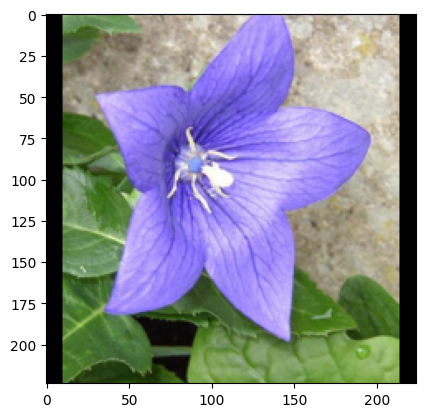

In [100]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = np.array(image)
    image = image.transpose(( 1,2,0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

pic = process_image(pract_image)
imshow(pic)

<Axes: >

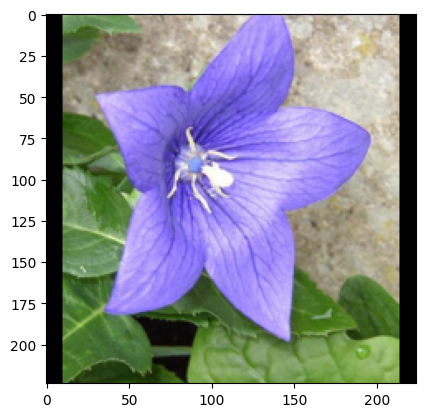

In [101]:
imshow(process_image(pract_image))

In [244]:
def predict(img_path, model_build, topf=5):
  model_build.to(device)
  print(device)
  model_build.eval()

  img = process_image(img_path)
  img = torch.from_numpy(img).type(torch.FloatTensor)
  img = img.unsqueeze(0).float()

  with torch.no_grad():
    output = model_build.forward(img)
    output = torch.exp(output)
    probs, indices = output.topk(topf)
  '''probs = probs.numpy()
  indices = indices.numpy


  probs = probs[0].tolist()
  indices = indices[0].tolist()'''
  probs = np.array(probs.detach())[0]
  indices = np.array(labels.detach())[0]


  mapping = {idx: cls for cls, idx in model_build.class_to_idx.items()}

  #classes = [mapping[item] for item in indices]
  classes = mapping[indices]
  classes = np.array(classes).flatten()


  return probs, classes

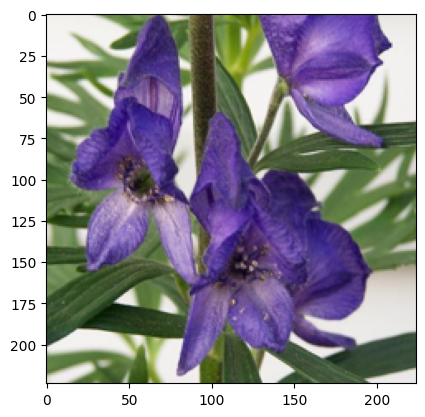

cpu


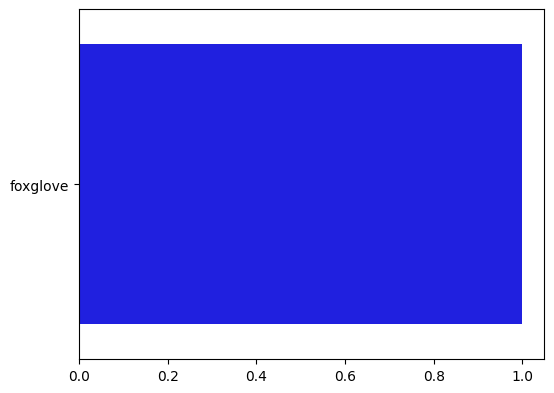

In [246]:

file = "flowers/train/9/image_06401.jpg"
img = process_image(file)

imshow(img)
plt.show()
probs, classes = predict(file, model_build, 5)
#probs = [probs[0]]
#names = [cat_to_name[classes[0]]]
probs = probs.tolist()[0]
names = [cat_to_name[idx] for idx in classes]
#names = [cat_to_name[i] for i in classes]

plt.figure(figsize = (6, 10))
plt.subplot(2,1,1)



sns.barplot(x=probs, y = names, color = 'blue');

plt.show()
